# Exercício MiniBoss - Coop

## Carregar os Dados (do Discord): credit_scoring_eng

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
df = pd.read_csv('credit_scoring_eng.csv')


In [11]:
# Exibir as primeiras linhas do DataFrame
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [12]:
# Exibir informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Realize a Análise Exploratória: Utilize funções para verificar a estrutura do conjunto de dados (ex: head(), info()). Descreva brevemente o que cada coluna significa.

## Descrição das Colunas do Conjunto de Dados

| **Nome da Coluna**     | **Descrição**                                                                 |
|------------------------|---------------------------------------------------------------------------------|
| **children**           | Número de filhos na família do cliente.                                        |
| **days_employed**      | Número de dias que o cliente esteve empregado (pode conter valores ausentes).  |
| **dob_years**         | Idade do cliente em anos, calculada a partir da data de nascimento.           |
| **education**          | Nível de escolaridade do cliente (ex.: ensino superior, ensino médio).        |
| **education_id**       | Identificador único para cada nível de escolaridade.                           |
| **family_status**      | Estado civil do cliente (ex.: solteiro, casado, divorciado).                  |
| **family_status_id**   | Identificador único para cada categoria de estado civil.                       |
| **gender**             | Gênero do cliente (ex.: masculino, feminino).                                  |
| **income_type**        | Tipo de fonte de renda (ex.: salário, negócio próprio).                        |
| **debt**               | Indica se o cliente possui dívidas (1 para sim, 0 para não).                  |
| **total_income**       | Renda total mensal do cliente (pode conter valores ausentes).                  |
| **purpose**            | Finalidade para a qual o crédito é solicitado (ex.: compra de casa, compra de carro). |


## Limpeza dos Dados: Identifique valores ausentes em cada coluna. \
Responda: Quais colunas tem valores ausentes?\
Qual percentual de valores ausentes para cada coluna? (cof cof df.isna().sum() / len(df)
desculpe tossi durante a escrita).

In [13]:

# Calcular o número de valores ausentes em cada coluna
missing_values = df.isna().sum()

# Calcular o percentual de valores ausentes para cada coluna
missing_percentage = (missing_values / len(df)) * 100

# Criar um DataFrame para exibir os resultados
missing_data = pd.DataFrame({'Valores Ausentes': missing_values, 'Percentual': missing_percentage})

# Exibir as colunas com valores ausentes
missing_data[missing_data['Valores Ausentes'] > 0]

,Valores Ausentes,Percentual
days_employed,2174,10.099884
total_income,2174,10.099884


## Gere um gráfico heatmap no Seaborn para visualizar os valores ausentes. Eles seguem algum padrão? Qual melhor maneira de lidar com esses dados ausentes e por que?

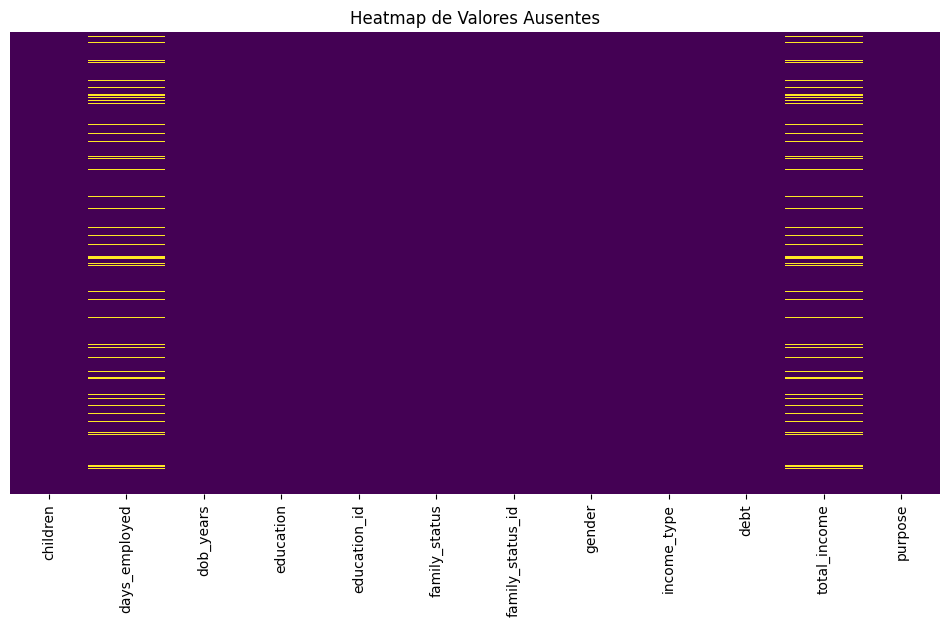

In [14]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Criar um heatmap para visualizar os valores ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Adicionar título ao gráfico
plt.title('Heatmap de Valores Ausentes')
plt.show()

## Análise de Valores Ausentes

### Padrões nos Valores Ausentes
Após a visualização dos valores ausentes utilizando um heatmap, é possível identificar se há padrões na ausência de dados. Se as colunas `days_employed` e `total_income` apresentarem valores ausentes simultaneamente, isso pode indicar uma relação entre essas variáveis. Por exemplo, pode haver um padrão onde clientes com maior tempo de emprego tendem a reportar sua renda, enquanto aqueles com menos tempo de emprego não o fazem.

### Melhor Maneira de Lidar com Dados Ausentes
Existem várias abordagens para lidar com dados ausentes, e a escolha da melhor técnica depende do contexto dos dados e da análise que se pretende realizar. Abaixo estão algumas opções:

1. **Imputação**:
   - **Preenchimento com Média/Mediana**: Para colunas numéricas como `total_income`, preencher os valores ausentes com a média ou mediana pode ser uma solução eficaz. Isso mantém o tamanho do conjunto de dados e evita a perda de informações.
   - **Imputação por Modelo**: Utilizar algoritmos de aprendizado de máquina para prever valores ausentes com base em outras variáveis pode ser uma abordagem mais sofisticada e precisa.

2. **Remoção**:
   - **Exclusão de Linhas**: Se a quantidade de dados ausentes for pequena em comparação ao total, pode ser viável remover essas linhas. No entanto, isso deve ser feito com cautela para não perder informações importantes.
   - **Exclusão de Colunas**: Se uma coluna tiver uma alta proporção de valores ausentes (por exemplo, mais de 30%), pode ser mais apropriado removê-la completamente, pois isso pode indicar que a coluna não é confiável.

3. **Análise dos Dados Ausentes**:
   - Antes de decidir sobre a imputação ou remoção, é importante analisar o motivo pelo qual os dados estão ausentes. Se os dados estiverem faltando aleatoriamente (MCAR), a imputação pode ser mais segura. Se houver um padrão (MAR ou MNAR), técnicas mais complexas podem ser necessárias.

### Conclusão
A melhor maneira de lidar com dados ausentes depende da análise que se deseja realizar e do impacto que esses dados podem ter nos resultados. A imputação é geralmente preferida para manter o tamanho do conjunto de dados, mas deve ser feita com cuidado para evitar introduzir viés. Remover dados deve ser considerado apenas quando os valores ausentes são substancialmente altos ou quando há razões claras para acreditar que a ausência não afetará a análise.

## Tratamento de Dados Inválidos:
Verifique se há Outliers e os dados estatísticos da coluna 
“children” e “days_employed” trate-os adequadamente.\
Qual melhor maneira de lidar com os outliers dessa coluna e pq?

In [15]:
# Estatísticas descritivas para as colunas 'children' e 'days_employed'
stats_children = df['children'].describe()
stats_days_employed = df['days_employed'].describe()

print("Estatísticas para 'children':\n", stats_children)
print("\nEstatísticas para 'days_employed':\n", stats_days_employed)

Estatísticas para 'children':
 count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

Estatísticas para 'days_employed':
 count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64


In [18]:
# Cálculo do IQR para 'children'
Q1_children = df['children'].quantile(0.25)
Q3_children = df['children'].quantile(0.75)
IQR_children = Q3_children - Q1_children

lower_bound_children = Q1_children - 1.5 * IQR_children
upper_bound_children = Q3_children + 1.5 * IQR_children

outliers_children = df[(df['children'] < lower_bound_children) | (df['children'] > upper_bound_children)]
outliers_children

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,102166.458894,property renovation
294,4,-2220.384765,36,masters degree,0,civil partnership,1,F,employee,0,335024.672602,wedding ceremony
352,3,-2949.422637,35,secondary education,1,married,0,M,partner,0,192528.947510,car
606,20,-880.221113,21,secondary education,1,married,0,M,partner,0,145334.865002,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
21412,3,-3512.707324,46,masters degree,0,married,0,F,employee,0,265055.505129,supplementary education
21470,3,-1555.901115,38,masters degree,0,married,0,M,partner,0,210504.971289,to become educated
21484,3,-968.718123,35,secondary education,1,married,0,M,employee,0,95667.452395,housing
21491,20,-173.954460,27,secondary education,1,married,0,F,employee,0,155520.899688,buying a second-hand car


In [20]:

# Cálculo do IQR para 'days_employed'
Q1_days_employed = df['days_employed'].quantile(0.25)
Q3_days_employed = df['days_employed'].quantile(0.75)
IQR_days_employed = Q3_days_employed - Q1_days_employed

lower_bound_days_employed = Q1_days_employed - 1.5 * IQR_days_employed
upper_bound_days_employed = Q3_days_employed + 1.5 * IQR_days_employed

outliers_days_employed = df[(df['days_employed'] < lower_bound_days_employed) | (df['days_employed'] > upper_bound_days_employed)]
outliers_days_employed

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
8,2,-6929.865299,35,MASTERS DEGREE,0,civil partnership,1,F,employee,0,95856.832424,having a wedding
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,56823.777243,buying a second-hand car
19,0,-10038.818549,48,SECONDARY EDUCATION,1,divorced,3,F,employee,0,242831.107982,buying my own car
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,75439.993167,to have a wedding
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,72638.590915,property
21509,0,362161.054124,59,masters degree,0,married,0,M,retiree,0,73029.059379,real estate transactions
21518,0,373995.710838,59,SECONDARY EDUCATION,1,married,0,F,retiree,0,153864.650328,purchase of a car


## Melhor Maneira de Lidar com Outliers

A melhor maneira de lidar com outliers depende do contexto dos dados e do impacto que esses valores podem ter na análise:

- **Remoção**: Se os outliers forem claramente erros de medição ou entrada de dados, removê-los pode ser a melhor abordagem.
  
- **Substituição**: Em vez de remover, considere substituir os outliers por valores mais representativos, como a mediana da coluna. Isso preserva a integridade do conjunto de dados.
  
- **Transformação**: Aplicar transformações matemáticas (como logaritmos) pode ajudar a reduzir o impacto dos outliers sem removê-los.
  
- **Modelagem Robusta**: Usar algoritmos que sejam menos sensíveis a outliers pode ser uma solução eficaz em análises preditivas.



## Remova dados duplicados:
Verifique se há dados duplicados, se tiver remova eles e reset o 
index.\
Existe uma correlação entre ter filhos e pagar o aluguel em dia?\
Existe uma correlação entre status familiar e pagamento em dia

In [21]:
# Verificar se existem dados duplicados
duplicated_rows = df.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicated_rows}")

Número de linhas duplicadas: 54


In [22]:
# Remover dados duplicados
df = df.drop_duplicates()

# Resetar o índice
df.reset_index(drop=True, inplace=True)

# Verificar novamente se existem dados duplicados
duplicated_rows_after = df.duplicated().sum()
print(f"Número de linhas duplicadas após remoção: {duplicated_rows_after}")

Número de linhas duplicadas após remoção: 0


In [23]:
# Analisar a correlação entre 'children' e 'debt'
correlation_children_debt = df.groupby('children')['debt'].mean()
print("Correlação entre ter filhos e pagamento em dia:\n", correlation_children_debt)

Correlação entre ter filhos e pagamento em dia:
 children
-1     0.021277
 0     0.075353
 1     0.092327
 2     0.094542
 3     0.081818
 4     0.097561
 5     0.000000
 20    0.105263
Name: debt, dtype: float64


In [24]:
# Analisar a correlação entre 'family_status' e 'debt'
correlation_family_status_debt = df.groupby('family_status')['debt'].mean()
print("Correlação entre status familiar e pagamento em dia:\n", correlation_family_status_debt)

Correlação entre status familiar e pagamento em dia:
 family_status
civil partnership    0.093202
divorced             0.071130
married              0.075421
unmarried            0.097509
widow / widower      0.065693
Name: debt, dtype: float64


## Interpretação dos Resultados

### Correlação entre Filhos e Pagamento em Dia
A média da coluna `debt` para diferentes valores da coluna `children` mostrará se existe uma tendência em relação ao pagamento em dia com base no número de filhos. Um valor médio mais baixo indicaria que famílias com mais filhos tendem a pagar suas dívidas em dia, enquanto um valor mais alto indicaria o contrário.

### Correlação entre Status Familiar e Pagamento em Dia
A média da coluna `debt` agrupada por `family_status` permitirá observar como diferentes estados civis impactam a probabilidade de estar em dia com os pagamentos. Isso pode revelar padrões interessantes sobre como o estado civil influencia a responsabilidade financeira.

# Carregar os Dados (do Discord): games.cvs
## Realize transformação dos dados: Utilize funçõao groupby() para agrupar os dados por platform e year

In [26]:
import pandas as pd

# Carregar os dados do arquivo CSV
df = pd.read_csv('games.csv')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [29]:
# Agrupar os dados por 'Platform' e 'Year_of_Release', e calcular a soma das vendas (ou outra métrica)
grouped_data = df.groupby(['Platform', 'Year_of_Release']).sum()

grouped_data

Name  \
Platform Year_of_Release                                                      
2600     1980.0           AsteroidsMissile CommandKaboom!DefenderBoxingI...   
         1981.0           Pitfall!FroggerDemon AttackE.T.: The Extra Ter...   
         1982.0           Pac-ManDig DugMario Bros.Pole PositionMoon Pat...   
         1983.0           Pitfall II: Lost CavernsJr. Pac-ManCrystal Cas...   
         1984.0                                                   Beamrider   
...                                                                     ...   
XB       2008.0                                               Madden NFL 09   
XOne     2013.0           Call of Duty: GhostsAssassin's Creed IV: Black...   
         2014.0           Grand Theft Auto VCall of Duty: Advanced Warfa...   
         2015.0           Call of Duty: Black Ops 3Halo 5: GuardiansFall...   
         2016.0           FIFA 17Call of Duty: Infinite WarfareBattlefie...   

                                                                      Genre  \
Platform Year_of_Release                                                      
2600     1980.0           ShooterShooterMiscMiscFightingSportsActionMisc...   
         1981.0           PlatformActionShooterActionPuzzleShooterPlatfo...   
         1982.0           PuzzlePuzzlePlatformRacingShooterPlatformPlatf...   
         1983.0           PlatformPuzzleActionActionShooterActionAdventu...   
         1984.0                                                      Racing   
...                                                                     ...   
XB       2008.0                                                      Sports   
XOne     2013.0           ShooterActionRacingShooterActionActionSportsAc...   
         2014.0           ActionShooterActionShooterShooterShooterMiscSp...   
         2015.0           ShooterShooterRole-PlayingShooterShooterSports...   
         2016.0           SportsShooterShooterShooterShooterSportsRacing...   

                          NA_sales  EU_sales  JP_sales  Other_sales  \
Platform Year_of_Release                                              
2600     1980.0              10.59      0.67      0.00         0.12   
         1981.0              33.40      1.96      0.00         0.32   
         1982.0              26.92      1.65      0.00         0.31   
         1983.0               5.44      0.34      0.00         0.06   
         1984.0               0.26      0.01      0.00         0.00   
...                            ...       ...       ...          ...   
XB       2008.0               0.13      0.04      0.00         0.01   
XOne     2013.0              11.85      5.34      0.02         1.75   
         2014.0              30.97     18.15      0.14         4.81   
         2015.0              36.03     18.47      0.17         5.47   
         2016.0              14.27      9.63      0.01         2.24   

                          Critic_Score  \
Platform Year_of_Release                 
2600     1980.0                    0.0   
         1981.0                    0.0   
         1982.0                    0.0   
         1983.0                    0.0   
         1984.0                    0.0   
...                                ...   
XB       2008.0                    0.0   
XOne     2013.0                  954.0   
         2014.0                 3194.0   
         2015.0                 3814.0   
         2016.0                 4430.0   

                                                                 User_Score  \
Platform Year_of_Release                                                      
2600     1980.0                                                           0   
         1981.0                                                           0   
         1982.0                                                           0   
         1983.0                                                           0   
         1984.0                                                       

In [34]:
# Remover linhas com valores ausentes nas colunas relevantes
df = df.dropna(subset=['Critic_Score', 'User_Score', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'])

In [33]:
# Converter colunas para tipos numéricos
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['NA_sales'] = pd.to_numeric(df['NA_sales'], errors='coerce')
df['EU_sales'] = pd.to_numeric(df['EU_sales'], errors='coerce')
df['JP_sales'] = pd.to_numeric(df['JP_sales'], errors='coerce')
df['Other_sales'] = pd.to_numeric(df['Other_sales'], errors='coerce')

In [36]:
# Agrupar os dados por 'Platform' e 'Year_of_Release'
grouped_data = df.groupby(['Platform', 'Year_of_Release']).agg({
    'Critic_Score': 'mean',   # Média das notas dos críticos
    'User_Score': 'mean',      # Média das notas dos usuários
    'NA_sales': 'sum',         # Soma das vendas na América do Norte
    'EU_sales': 'sum',         # Soma das vendas na Europa
    'JP_sales': 'sum',         # Soma das vendas no Japão
    'Other_sales': 'sum'       # Soma das vendas em outras regiões
}).reset_index()

# Exibir o resultado do agrupamento e agregação
grouped_data

,Platform,Year_of_Release,Critic_Score,User_Score,NA_sales,EU_sales,JP_sales,Other_sales
0,3DS,2011.0,63.464286,6.492857,20.14,13.32,7.33,3.24
1,3DS,2012.0,73.000000,7.193939,14.78,10.01,12.38,2.22
2,3DS,2013.0,66.700000,6.915000,5.95,4.75,4.22,0.97
3,3DS,2014.0,68.277778,7.077778,3.24,2.28,5.46,0.51
4,3DS,2015.0,71.105263,7.536842,3.87,2.55,3.52,0.61
...,...,...,...,...,...,...,...,...
132,XB,2007.0,73.666667,7.233333,0.41,0.12,0.00,0.02
133,XOne,2013.0,68.142857,5.650000,9.32,4.20,0.02,1.38
134,XOne,2014.0,74.279070,6.697674,26.90,15.81,0.13,4.17
135,XOne,2015.0,74.080000,6.508000,26.92,13.45,0.13,4.08


## Use a função pivot_table() para organizar os dados de forma que as plataformas fiquem nas linhas e as regiões nas colunas

In [37]:
# Criar uma tabela pivô com plataformas como índice e regiões como colunas
pivot_table = df.pivot_table(
    index='Platform', 
    values=['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales'], 
    aggfunc='sum'  # Você pode usar 'mean' ou outra função de agregação se preferir
)

# Exibir a tabela pivô resultante
pivot_table

,EU_sales,JP_sales,NA_sales,Other_sales
Platform,,,,
3DS,33.54,33.87,48.89,7.69
DC,0.29,2.66,1.54,0.06
DS,95.95,83.66,174.31,29.95
GBA,32.82,16.13,79.99,3.59
GC,31.20,16.12,108.98,4.30
PC,109.66,0.17,65.05,18.67
PS,65.75,40.38,93.47,11.77
PS2,260.13,76.39,481.15,144.75
PS3,276.51,55.42,345.14,115.88


## Calcule a soma das vendas por plataforma para cada região.

In [38]:
# Agrupar os dados por 'Platform' e calcular a soma das vendas para cada região
sales_summary = df.groupby('Platform').agg({
    'NA_sales': 'sum',
    'EU_sales': 'sum',
    'JP_sales': 'sum',
    'Other_sales': 'sum'
}).reset_index()

# Exibir o resultado da soma das vendas por plataforma
sales_summary

,Platform,NA_sales,EU_sales,JP_sales,Other_sales
0,3DS,48.89,33.54,33.87,7.69
1,DC,1.54,0.29,2.66,0.06
2,DS,174.31,95.95,83.66,29.95
3,GBA,79.99,32.82,16.13,3.59
4,GC,108.98,31.20,16.12,4.30
5,PC,65.05,109.66,0.17,18.67
6,PS,93.47,65.75,40.38,11.77
7,PS2,481.15,260.13,76.39,144.75
8,PS3,345.14,276.51,55.42,115.88
9,PS4,84.46,112.44,9.43,37.94


## Filtre as 5 plataformas mais vendidas e visualize a variação no mercado.

In [44]:

# Verificar as colunas do DataFrame
print(sales_summary.columns)

# Se a coluna 'Total_Sales' não existir, criar a coluna somando as vendas das regiões corretas
if 'Total_Sales' not in sales_summary.columns:
    # Criar a coluna 'Total_Sales' somando as vendas das regiões corretas
    sales_summary['Total_Sales'] = sales_summary[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].sum(axis=1)

# Filtrar as 5 plataformas mais vendidas
top_5_platforms = sales_summary.nlargest(5, 'Total_Sales')
top_5_platforms


Index(['Platform', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales',
       'Total_Sales'],
      dtype='object')


,Platform,NA_sales,EU_sales,JP_sales,Other_sales,Total_Sales
7,PS2,481.15,260.13,76.39,144.75,962.42
14,X360,540.09,236.87,10.15,76.28,863.39
8,PS3,345.14,276.51,55.42,115.88,792.95
12,Wii,351.57,207.82,52.64,60.81,672.84
2,DS,174.31,95.95,83.66,29.95,383.87
